In [25]:
import numpy as np
import pandas as pd

import os

In [37]:
df = pd.read_csv("/kaggle/input/cost-of-international-education/International_Education_Costs.csv")
df = df.rename(columns={"Level": "Degree"})
df.head(10)

,Country,City,University,Program,Degree,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
5,Japan,Tokyo,University of Tokyo,Information Science,Master,2.0,8900,76.4,1300,220,750,145.80
6,Netherlands,Amsterdam,University of Amsterdam,Artificial Intelligence,Master,1.0,15800,73.2,1500,180,720,0.92
7,Singapore,Singapore,National University of Singapore,Finance,Master,1.5,35000,81.1,1900,90,800,1.34
8,France,Paris,Sorbonne University,International Relations,Master,2.0,4500,74.6,1400,99,650,0.92
9,Switzerland,Zurich,ETH Zurich,Physics,Master,2.0,1460,91.5,2100,88,1200,0.89


In [4]:
harvard_university = df.loc[(df.University == "Harvard University")]
harvard_university

,Country,City,University,Program,Degree,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.0
849,USA,Boston,Harvard University,Artificial Intelligence,Master,2.0,58000,82.1,2200,160,1500,1.0


In [5]:
mit = df.loc[(df.University == "MIT")]
mit

,Country,City,University,Program,Degree,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
30,USA,Boston,MIT,Electrical Engineering,PhD,5.0,53800,83.2,2200,160,1500,1.0
215,USA,Cambridge,MIT,Computer Science,Bachelor,4.0,55800,83.5,2300,160,1500,1.0
397,USA,Boston,MIT,Computer Science,Master,2.0,58000,82.1,2100,160,1500,1.0


EDA
====================================================================================================

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
categorical_columns = df.select_dtypes(include=['object'])

In [7]:
categorical_columns.describe()

,Country,City,University,Program,Degree
count,907,907,907,907,907
unique,71,556,622,92,3
top,UK,Singapore,University of Washington,Computer Science,Master
freq,93,18,6,312,451


In [8]:
numerical_columns.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [9]:
na_counts_per_col = df.isna().sum()
na_counts_per_col

Country              0
City                 0
University           0
Program              0
Degree               0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

In [10]:
duplicate_values = df.duplicated().sum()
duplicate_values

0

Data Visualizations
=

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
group_by_degree_df = df.groupby(["Country", "Degree"]).size().reset_index(name="Count")

bachelors_df = group_by_degree_df.loc[group_by_degree_df.Degree == "Bachelor"].sort_values("Count", ascending=False)
masters_df = group_by_degree_df.loc[group_by_degree_df.Degree == "Master"].sort_values("Count", ascending=False)
phds_df = group_by_degree_df.loc[group_by_degree_df.Degree == "PhD"].sort_values("Count", ascending=False)

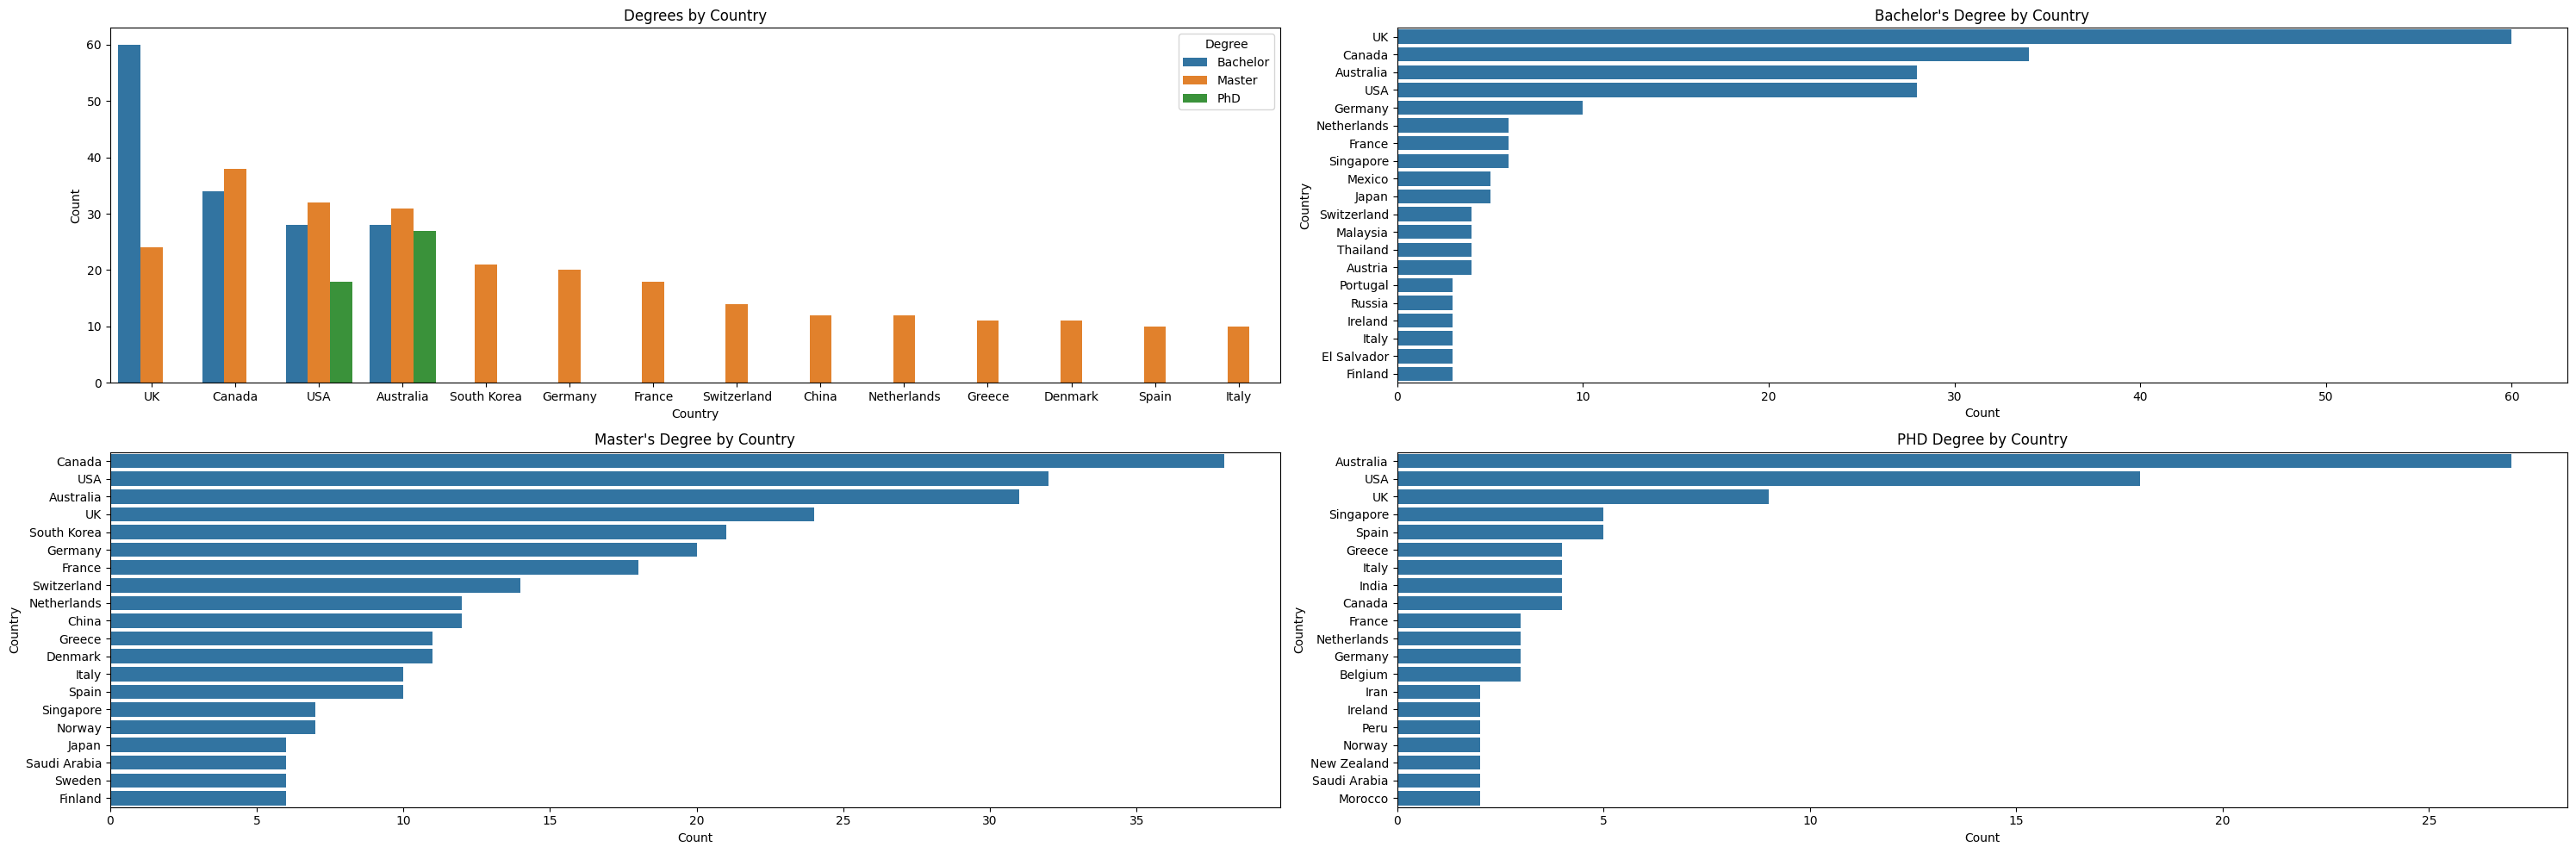

In [13]:
# top twenty of each degree
top_twenty = group_by_degree_df.sort_values("Count", ascending=False).head(20)
top_twenty_bachelor_countries = bachelors_df.head(20)
top_twenty_master_countries = masters_df.head(20)
top_twenty_phd_countries = phds_df.head(20)

# subplot creation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,10))

# bar plots
sns.barplot(data=top_twenty, x="Country", y="Count", hue="Degree", ax=axes[0,0]).set_title("Degrees by Country")
sns.move_legend(axes[0,0], loc="upper right")
sns.barplot(data=top_twenty_bachelor_countries, x="Count", y="Country", color="tab:blue", ax=axes[0,1]).set_title("Bachelor's Degree by Country")
sns.barplot(data=top_twenty_master_countries, x="Count", y="Country", color="tab:blue", ax=axes[1,0]).set_title("Master's Degree by Country")
sns.barplot(data=top_twenty_phd_countries, x="Count", y="Country", color="tab:blue", ax=axes[1,1]).set_title("PHD Degree by Country")

# show the graphs 
plt.tight_layout()
plt.show()

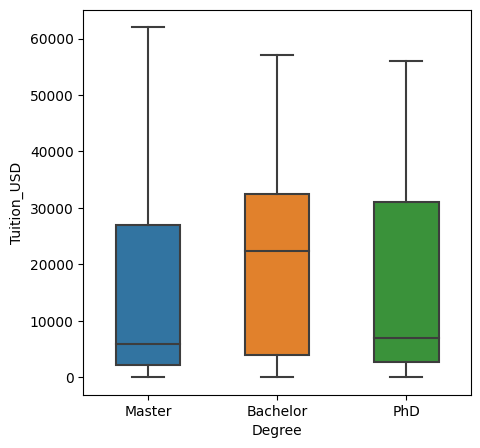

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x="Degree", y="Tuition_USD", width=0.5)
plt.show()

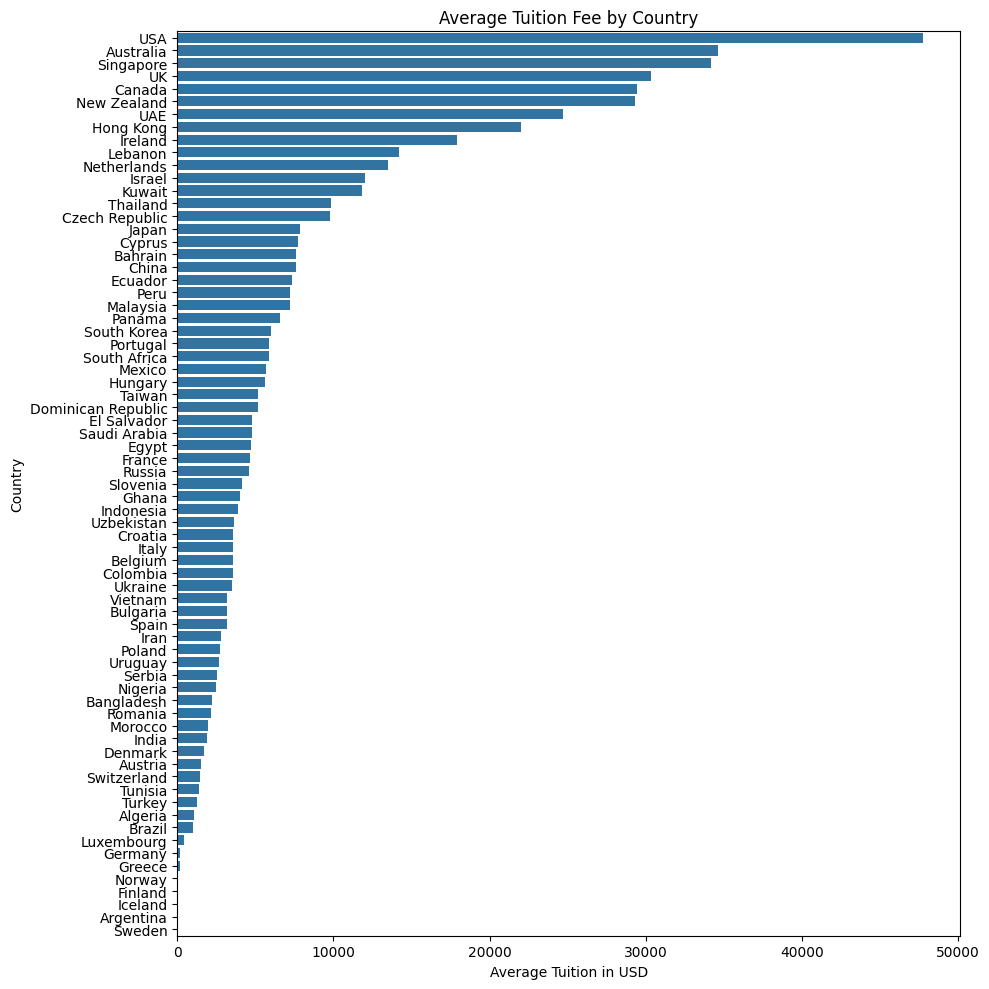

In [15]:
tuition_by_country = df.groupby("Country")["Tuition_USD"] \
                        .mean() \
                        .reset_index() \
                        .sort_values("Tuition_USD", ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(data=tuition_by_country, x="Tuition_USD", y="Country", color="tab:blue")

plt.title("Average Tuition Fee by Country")
plt.xlabel("Average Tuition in USD")
plt.ylabel("Country")

plt.tight_layout()

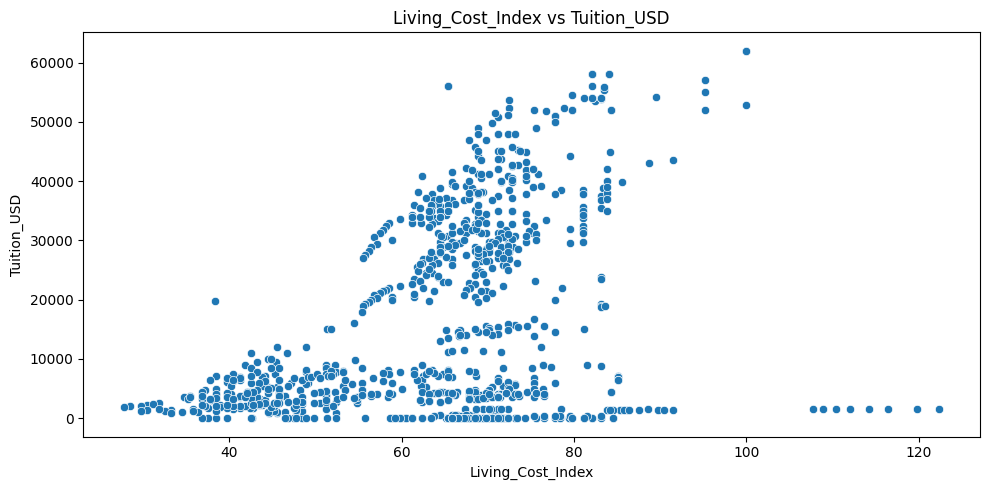

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Living_Cost_Index", y="Tuition_USD").set_title("Living_Cost_Index vs Tuition_USD")
plt.tight_layout()
plt.show()

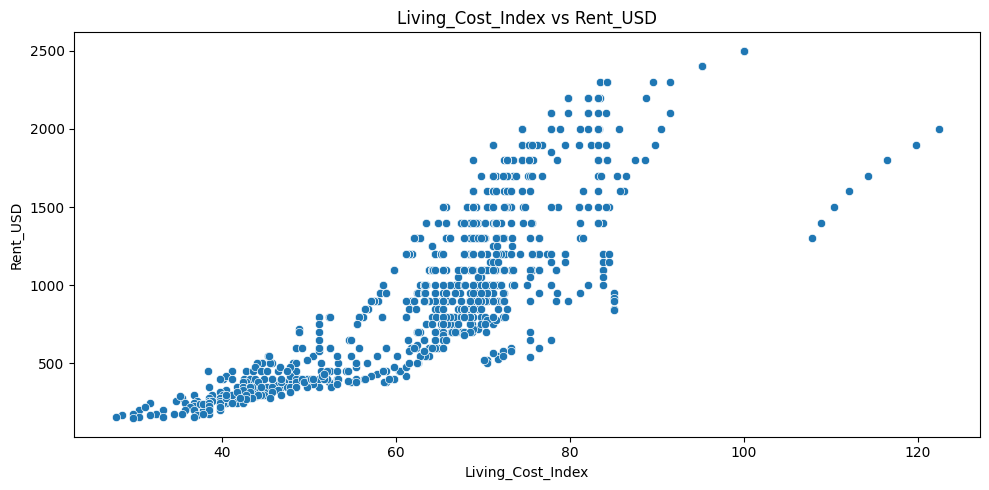

In [17]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x="Living_Cost_Index", y="Rent_USD").set_title("Living_Cost_Index vs Rent_USD")

plt.tight_layout()
plt.show()

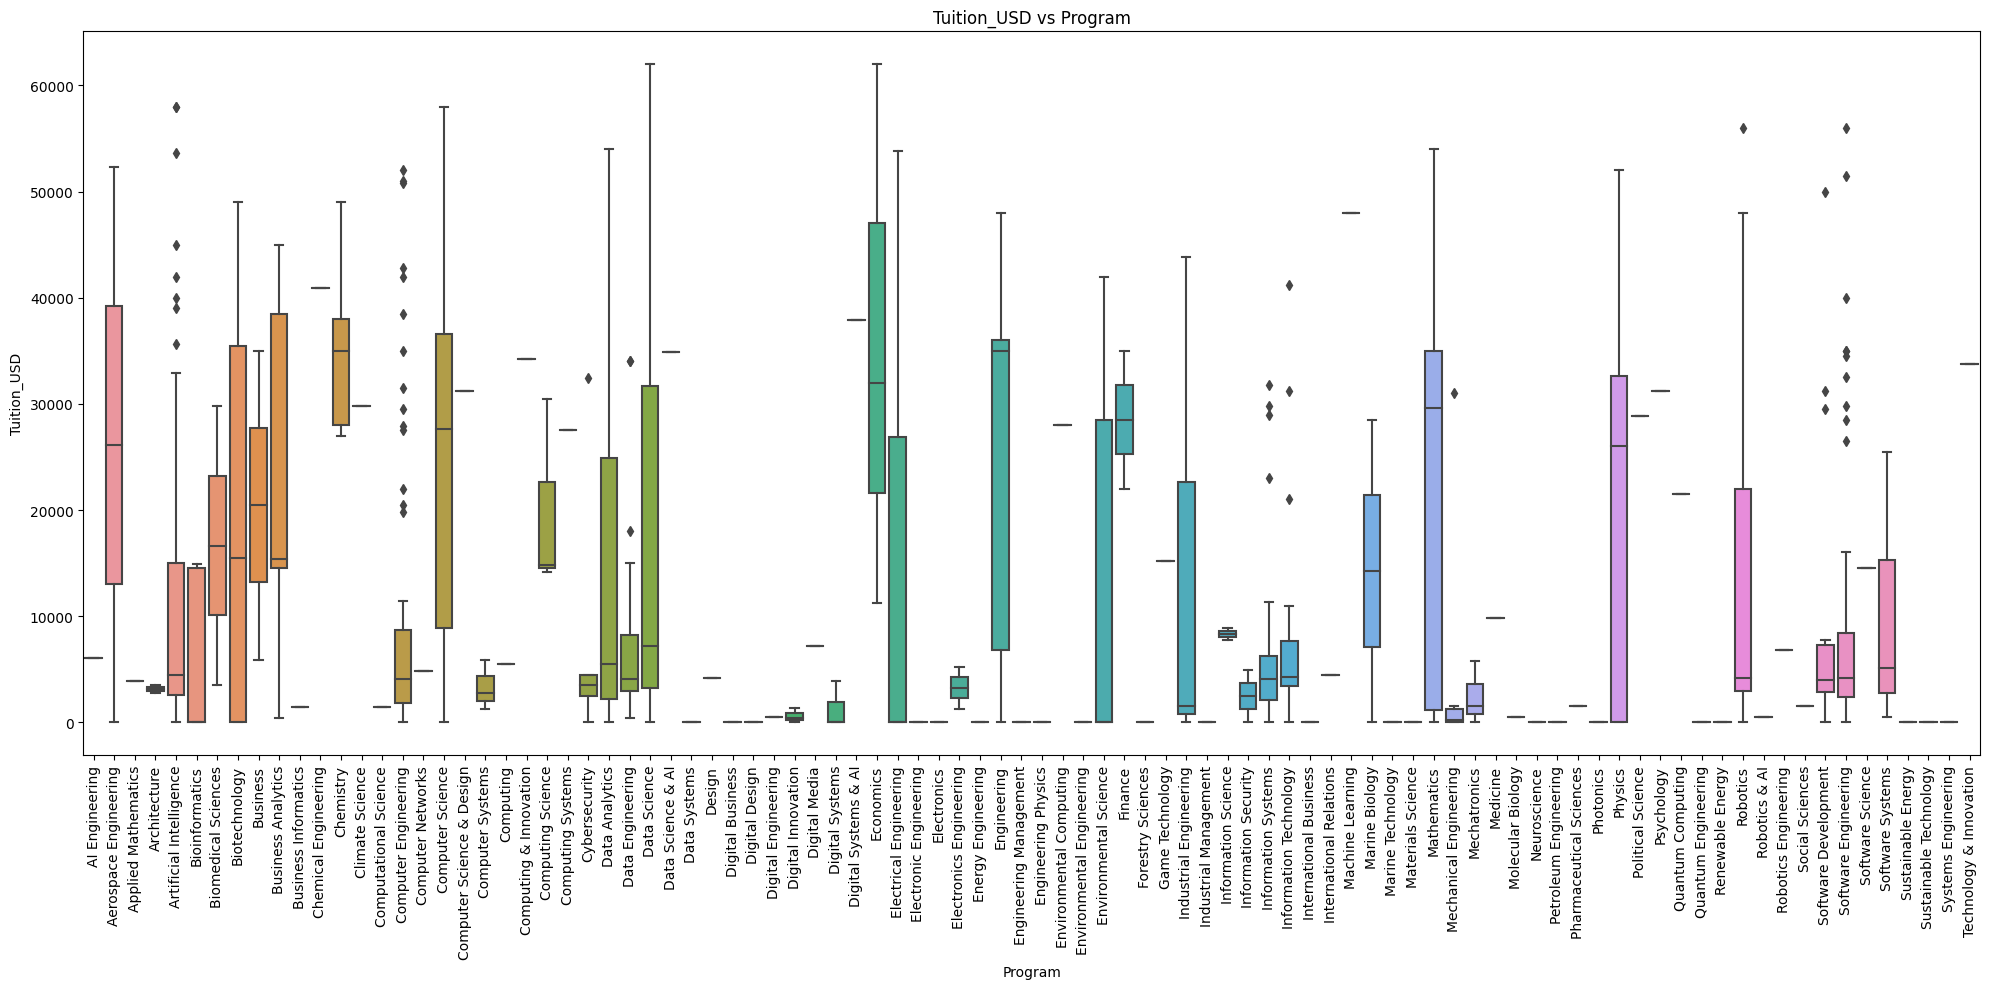

In [18]:
plt.figure(figsize=(20,10))

sorted_programs = df.sort_values("Program")
sns.boxplot(data=sorted_programs, x="Program", y="Tuition_USD").set_title("Tuition_USD vs Program")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

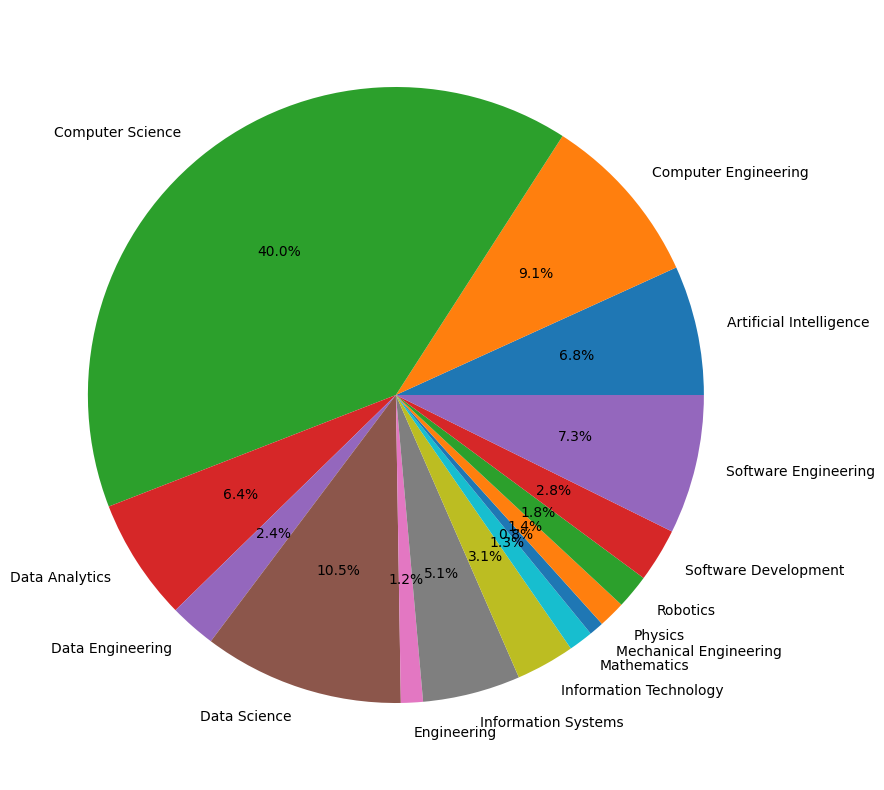

In [19]:
plt.figure(figsize=(10, 10))
program_count = df.groupby("Program")["Program"].size().reset_index(name="Count")
program_count_filter = program_count.loc[program_count.Count > 5]

plt.pie(program_count_filter.Count, labels=program_count_filter.Program, autopct='%1.1f%%')
plt.show()

Modeling
=

Notes:

Mean Absolute Error -> |acutal - predicted|
    
* We get all the absolute errors and take the average of them
* the avg will be the score
* we would say "On average, our predictions are off by about X"

Encoding categorical variables
* Helps a computer read human readable data
* Example: "USA" maps to some numeric value

Steps to Create the model
* Train, test and split the data
* Fit the model with training data
* Perform predictions
* Validate the model


In [34]:
# Preprocess categorical variables
from sklearn.preprocessing import LabelEncoder

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Models to try
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Measurements
from sklearn.metrics import mean_absolute_error


In [40]:
le = LabelEncoder()

# Transform categorical variables into numbers
for col in categorical_columns.columns:
    df[col] = le.fit_transform(df[col])

In [42]:
numerical_columns.columns

Index(['Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
       'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [45]:
df["Annual_Cost"] = df["Tuition_USD"] + df["Rent_USD"] * 12 + df["Visa_Fee_USD"] + df["Insurance_USD"]
df

,Country,City,University,Program,Degree,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Annual_Cost
0,66,84,101,17,1,2.0,55400,83.5,2200,160,1500,1.00,83460
1,65,283,128,27,1,1.0,41200,75.8,1800,485,800,0.79,64085
2,9,503,572,9,1,2.0,38500,72.5,1600,235,900,1.35,58835
3,2,313,495,44,1,2.0,42000,71.2,1400,450,650,1.52,59900
4,22,330,307,66,1,2.0,500,70.5,1100,75,550,0.92,14325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,21,469,556,25,1,2.0,4000,70.2,1000,99,850,0.92,16949
903,38,344,345,17,0,3.0,6800,50.5,400,120,400,4.65,12120
904,51,12,154,57,1,2.0,4200,64.2,600,200,800,3.75,12400
905,66,441,585,84,2,5.0,50000,77.8,2000,160,1500,1.00,75660


In [46]:
x = df.drop("Annual_Cost", axis=1)
y = df.Annual_Cost

In [47]:
# Default test size is 0.25
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=18)

In [25]:
results = []
for num_trees in range(50, 3001, 50):
    random_forest_model = RandomForestRegressor(n_estimators=num_trees, random_state=18)
    random_forest_model.fit(x_train, y_train)
    
    cost_predictions = random_forest_model.predict(x_val)
    mae_score = mean_absolute_error(y_val, cost_predictions)

    results.append({
        "Trees": num_trees,
        "MAE_Score": mae_score
    })
    # print(f"On average, with n_estimators: {num_trees} we our predictions are off by about ${mae_score}")

results_df = pd.DataFrame(results)

In [26]:
results_df.loc[results_df["MAE_Score"].idxmin()]

Trees        700.000000
MAE_Score    587.130642
Name: 13, dtype: float64

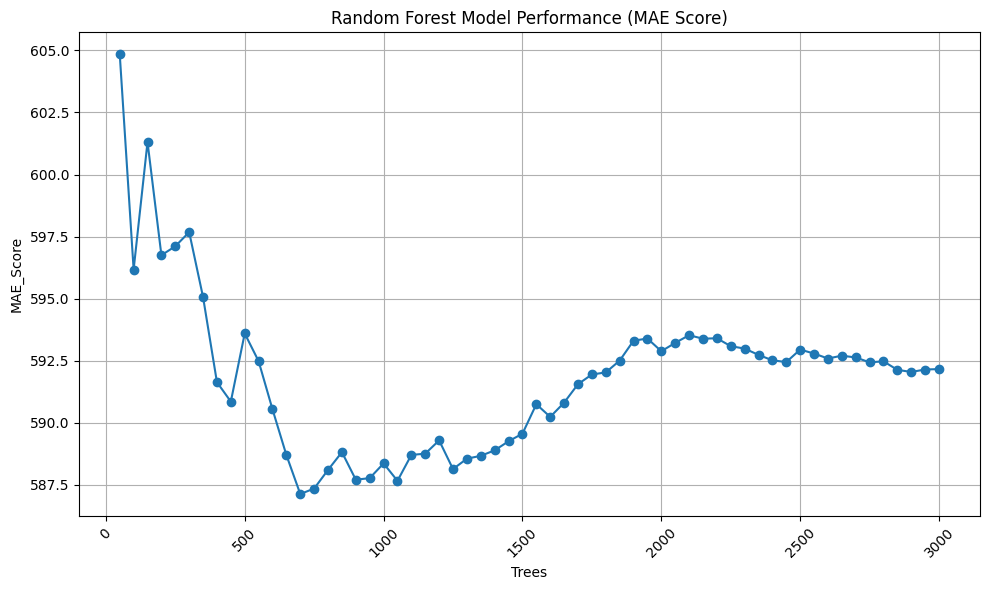

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Trees'], results_df['MAE_Score'], marker='o', linestyle='-')
plt.title('Random Forest Model Performance (MAE Score)')
plt.xlabel('Trees')
plt.ylabel('MAE_Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=18, test_size=0.2)

In [29]:
results = []

for num_trees in range(50, 3001, 50):
    random_forest_model = RandomForestRegressor(n_estimators=num_trees, random_state=18)
    random_forest_model.fit(x_train, y_train)
    
    cost_predictions = random_forest_model.predict(x_val)
    mae_score = mean_absolute_error(y_val, cost_predictions)

    results.append({
        "Trees": num_trees,
        "MAE_Score": mae_score
    })
    # print(f"On average, with n_estimators: {num_trees} we our predictions are off by about ${mae_score}")

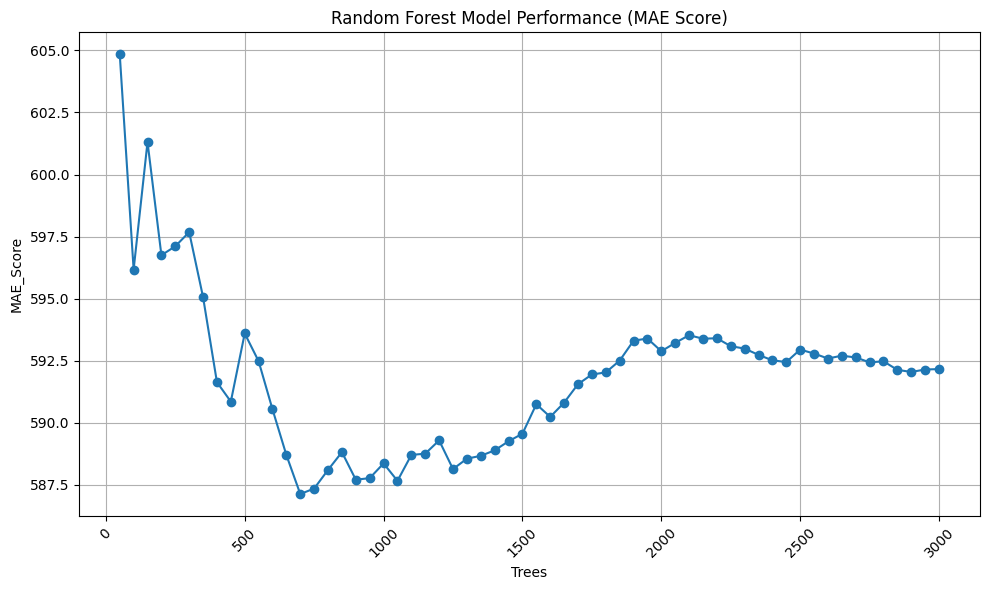

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Trees'], results_df['MAE_Score'], marker='o', linestyle='-')
plt.title('Random Forest Model Performance (MAE Score)')
plt.xlabel('Trees')
plt.ylabel('MAE_Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


pipeline = Pipeline(steps=[("model", RandomForestRegressor(n_estimators=2000,random_state=18))])

scores = -1 * cross_val_score(pipeline, x, y, cv=5, scoring="neg_mean_absolute_error")

In [50]:
scores.mean()

808.3254625371865

On average the model's predictions are off by about $808.33 setting n_estimators=2000 for a random forest model

In [34]:
xgb_model = XGBRegressor()

xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_val)

print(mean_absolute_error(y_val, xgb_predictions))

540.432119516226


Using XGB improves the model's predictions. On average, the model is off by $540.43

What I've learned:

EDA and Visualizations
* Pandas, Seaborn and Matplotlib is a lot more fun than I oringally thought
* I avoided visualizing the data for a long time, but have learned that it's a big part of exploring. Although my graphs are pretty simple so far, learning the tools has been very fun
* It was interesting to see that distribution of costs between a Bacehlor's and PhD were similar, but the average cost for a Bachelor's is larger than a PhD.
* The pie chart shows that the majority of universities offer Computer Science programs followed by its sub-domains.

Modeling
* For predicting the cost of studying abroad, I built a random forest model and used XGBRegressor from sklearn
* I chose to use Mean Absolute Error to validate my models.
* Since this is my first machine learning project to work on, I was curious to see how the number of trees affects model performance. No surprise at all, the more trees that are used in the random forest, the better the performance. The ideal number of trees seems to be around 2000 since that's where the plateau falls off. However, it did take a few minutes to find the ideal number of trees. I also performed cross-validation on the data since the dataset has about 900 rows.
* I used XGBoost to then improve model performance by only being off by about $300 less than my first model. For future enhancements, I would perform some hyper parameter tuning and double check for overfitting.
